## Predicting Survival on the Titanic using Logistic Regression

In this assignment we will be building a logistic regression classifier to predict survival on the titanic.   

The model will use the independent variables sex, age and class to predict the dependent variable survived.  

### Data Prep
First, I will start with some data prep to get the data ready to be used in a model

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Reading the data from the disk into memory
df = pd.read_csv("train.csv")

In [3]:
#Here are all the column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#Creating a new dataframe and adding to it only the variables we will be using
X = pd.DataFrame()
X['sex'] = df['Sex']
#X['age'] = df['Age']
X['pclass'] = df['Pclass']
#X['pclass'] = df['Pclass'].astype(str)
#X['fare'] = df['Fare']
X['sibsp'] = df['SibSp']
#X['parch'] = df['Parch']
#X['ticket'] = df['Ticket']
#X['embarked'] = df['Embarked']
X['survived'] = df['Survived']

In [5]:
#X = X.dropna(axis=0)

In [6]:
X

,sex,pclass,sibsp,survived
0,male,3,1,0
1,female,1,1,1
2,female,3,0,1
3,female,1,1,1
4,male,3,0,0
5,male,3,0,0
6,male,1,0,0
7,male,3,3,0
8,female,3,0,1
9,female,2,1,1


In [7]:
#survived is the dependent variable, y.   Here, we assign it to y and remove it from X.
y = X['survived']
X = X.drop(['survived'], axis=1)

In [8]:
# We need to handle Sex such that it's categorical, for logistic regression.
# Currently it's a string

#We can use pandas get_dummies to implement one hot encoding.
pd.get_dummies(X.sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [9]:
#IMPORTANT! get_dummies returns an indicator variable for each category.
#It's important to drop one category. Otherwise, you'll have two perfectly colinear variables.   

#Here, since we only have two variables it's easy. We'll take one variable and reassign it to sex. 
#Now Sex becomes female = 1, male = 0
X['sex'] = pd.get_dummies(X.sex)['female']

In [10]:
#pd.get_dummies(X.pclass)
#X['pclass1'] = pd.get_dummies(X.pclass)['1']
#X['pclass2'] = pd.get_dummies(X.pclass)['2']
#X = X.drop(['pclass'], axis=1)

In [11]:
#pd.get_dummies(X.embarked)

In [12]:
#X['embarkedS'] = pd.get_dummies(X.embarked)['S']

In [13]:
#X['embarkedC'] = pd.get_dummies(X.embarked)['C']

In [14]:
#X = X.drop(['embarked'], axis=1)

In [15]:
X

,sex,pclass,sibsp
0,0,3,1
1,1,1,1
2,1,3,0
3,1,1,1
4,0,3,0
5,0,3,0
6,0,1,0
7,0,3,3
8,1,3,0
9,1,2,1


In [16]:
# from sklearn.preprocessing import OneHotEncoder

In [17]:
#enc = OneHotEncoder(sparse=False)
#X_transform = enc.fit_transform(X)

In [18]:
#X_transform

In [19]:
#remember to scale our features, as with linear regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# X = scaler.fit_transform(X_transform)
X = scaler.fit_transform(X)

In [20]:
X

array([[-0.73769513,  0.82737724,  0.43279337],
       [ 1.35557354, -1.56610693,  0.43279337],
       [ 1.35557354,  0.82737724, -0.4745452 ],
       ..., 
       [ 1.35557354,  0.82737724,  0.43279337],
       [-0.73769513, -1.56610693, -0.4745452 ],
       [-0.73769513,  0.82737724, -0.4745452 ]])

In [21]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Creation
At this point we have a test set and train set defined.  We will use the train set to train our model and the test set to see how accurate the model is.

First, we will build a simple 'base rate' model to compare our logistic model to, so we can see if our logistic model is useful or not.  

Then, we'll build our logistic model.


#### Base Rate Model
For my base rate model, we're going to predict that everyone dies.

In [22]:
#This function looks for females in the test set and returns 1, survived, otherwise it returns 0
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y
    

In [23]:
#how accurate is my base rate model?
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.59


#### So, our base model is 59% correct, lets see if logistic can beat it.

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [25]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
print("Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic accuracy is 0.79


### Model Comparison

Our base model wasn't very good, but it looked better than it was because of class imbalance.  There are many more 0s than 1s in our dataset, so if we just guess 0 we can 'cheat.'

A better metric for binary classifer comparisons is AUC or area under the curve. 

Closely related is [precision and recall](http://scikit-learn.org/stable/auto_examples/plot_precision_recall.html).

Precision is the fraction of correctly identified examples of a class (ratio of true positives to all positives).

Recall is the fraction of observastions classified in that class that was correctly classified.  

#### It seems important to point out that most of the women in first class survived. 


In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [28]:
print("---Base Model---")
#base rate AUC
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test,base_rate_model(X_test) ))
print("\n\n---Logistic Model---")
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, model.predict(X_test) ))

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.59      1.00      0.74       105
          1       0.00      0.00      0.00        74

avg / total       0.34      0.59      0.43       179



---Logistic Model---
Logistic AUC = 0.78
             precision    recall  f1-score   support

          0       0.80      0.86      0.83       105
          1       0.78      0.70      0.74        74

avg / total       0.79      0.79      0.79       179



C:\Users\Karla\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

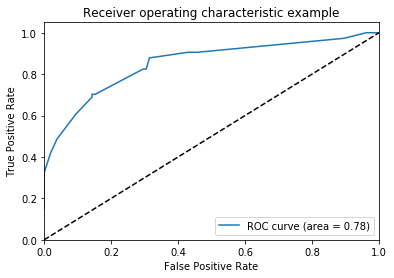

In [30]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()